<a href="https://colab.research.google.com/github/jayed87/time_series_features_exercise/blob/main/tunnel_traffic_with_time_series_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries and setting up the plot


In [10]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
simplefilter("ignore")
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

#Reading Dataset and set Day as index


In [18]:
tunnel = pd.read_csv('/content/tunnel.csv', parse_dates=['Day'])
tunnel = tunnel.set_index('Day')
tunnel = tunnel.to_period()
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


#Time dummy as time step features


In [20]:
df = tunnel.copy()
df['Time'] = np.arange(len(df.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


#Linear regression using time dummy features

In [23]:
from sklearn.linear_model import LinearRegression
X = df.loc[:,['Time']]
y = df.loc[:,'NumVehicles']
model = LinearRegression()
model.fit(X,y)
y_pred = pd.Series(model.predict(X), index=X.index)

Day
2003-11-02    98198.703794
2003-11-03    98221.201243
2003-11-04    98243.698693
2003-11-05    98266.196142
2003-11-06    98288.693592
2003-11-07    98311.191041
2003-11-08    98333.688491
2003-11-09    98356.185940
2003-11-10    98378.683390
2003-11-11    98401.180839
2003-11-12    98423.678289
2003-11-13    98446.175738
2003-11-14    98468.673188
2003-11-15    98491.170638
2003-11-16    98513.668087
2003-11-17    98536.165537
2003-11-18    98558.662986
2003-11-19    98581.160436
2003-11-20    98603.657885
Freq: D, dtype: float64

#Plotting the graph

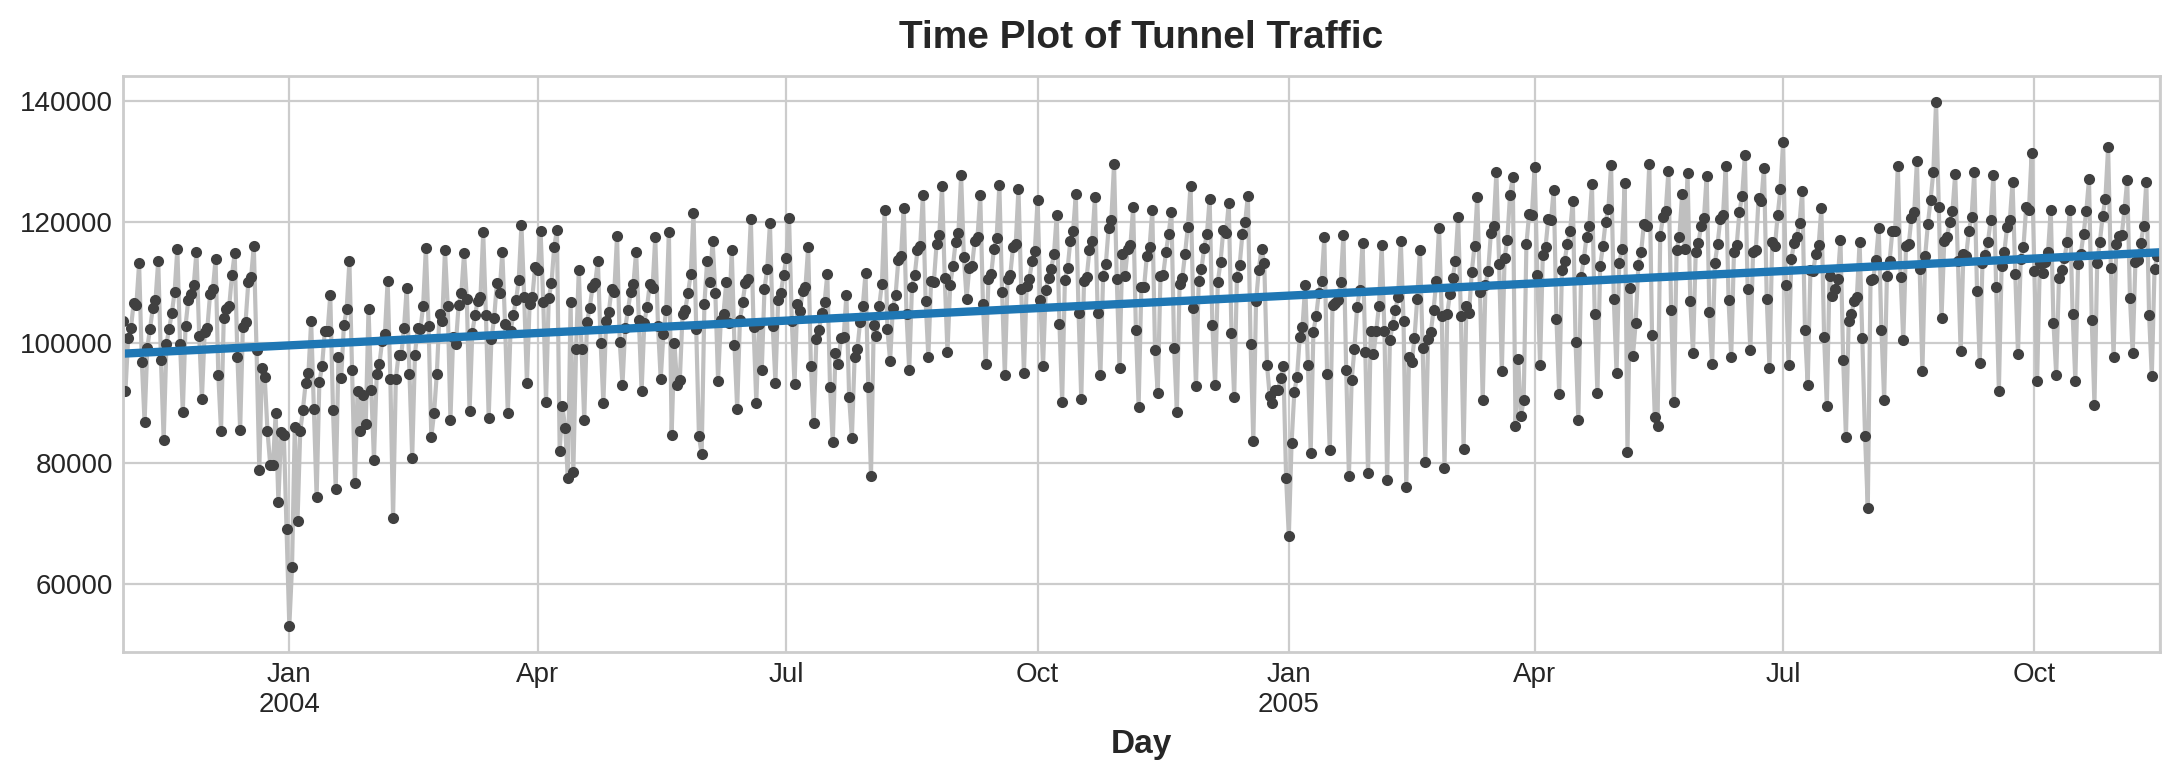

In [45]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');